In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve, ShuffleSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from IPython.display import display
import sklearn.cross_validation as cv

/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
X = pd.read_csv('~/projects/capstone/model_selection/pro2_Data.csv')
y = pd.read_csv('~/projects/capstone/model_selection/pro2_y.csv', header= None)
y = y[0]

In [3]:
import sklearn
import sklearn.model_selection

X_train, X_test, y_train, y_test= sklearn.model_selection.train_test_split(X, y)

In [4]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

### Bagging Ensembles:

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Bagging Classifier:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.912790133048


In [13]:
#Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.891910265126


### RandomForests:

In [14]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

In [15]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.90404972322


In [16]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [18]:
print(accuracy_score(y_test, y_pred_rf))

0.903078566573


In [19]:
#Out-of-Bag Evaluation:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.91389077724903689

In [20]:
bag_clf.oob_decision_function_

array([[ 0.99441341,  0.00558659],
       [ 0.49230769,  0.50769231],
       [ 1.        ,  0.        ],
       ..., 
       [ 0.87709497,  0.12290503],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ]])

In [21]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.91453821501408172

In [22]:
##Switching to PROJECT5
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)



In [23]:

# perform model evaluation
# build model evaluation function
from __future__ import print_function
import sklearn.metrics
import time

def evaluate_model(clf):
    """Scores a model using log loss with the created train and test sets."""
    start = time.time()
    clf.fit(X_train, y_train)
    train_loss = sklearn.metrics.log_loss(y_train, clf.predict_proba(X_train))
    test_loss = sklearn.metrics.log_loss(y_test, clf.predict_proba(X_test))
    print("Train score:", train_loss)
    print("Test score:", test_loss)
    print("Total time:", time.time() - start)
    print()
    return test_loss

In [24]:
evaluate_model(rf_clf)

Train score: 0.222436330272
Test score: 0.2218484733
Total time: 6.77012491226



0.22184847329957302

/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


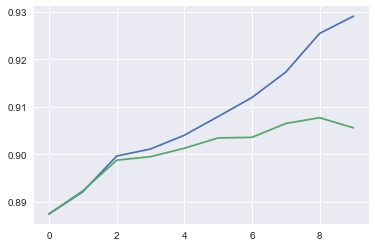

In [25]:
import sklearn.cross_validation
import numpy as np
import sklearn.learning_curve
import matplotlib.pyplot as plt
%matplotlib inline
max_depths = [1,2,3,4,5,6,7,8,9,10] # FILL ME IN
train_scores, test_scores = sklearn.learning_curve.validation_curve(
    RandomForestClassifier(), X_train, y_train, 'max_depth', max_depths)
plt.plot(np.mean(train_scores, axis=1), label='Train')
plt.plot(np.mean(test_scores, axis=1), label='Test')
# based on the plot the max_depth ~5

In [26]:
# grid search for the best params
from sklearn.grid_search import GridSearchCV
params = {'class_weight' : [{1:4},{1:3},{1:2}]}
grid = GridSearchCV(RandomForestClassifier(max_depth=4, n_estimators = 1000,max_features = 'auto'), 
                    params, scoring='log_loss')
evaluate_model(grid)

/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Drake

Train score: 0.255201117571
Test score: 0.253715624153
Total time: 119.162446976



0.25371562415327203

In [27]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={1: 2}, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [28]:
rf_maxd = grid.best_estimator_

In [29]:
rf_maxd.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={1: 2}, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [30]:
from sklearn.metrics import classification_report
rf_maxd.score(X_train, y_train)

0.90534459875044515

### Classification Reports:

In [31]:
from sklearn.metrics import classification_report
rf_pred_train= rf_maxd.predict(X_train)
target_names = ['Class_No', 'Class_Yes']
print (classification_report(y_train,rf_pred_train, target_names=target_names))

             precision    recall  f1-score   support

   Class_No       0.92      0.98      0.95     27384
  Class_Yes       0.66      0.35      0.45      3507

avg / total       0.89      0.91      0.89     30891



In [32]:
rf_pred_Test = rf_maxd.predict(X_test)
target_names = ['Class_No', 'Class_Yes']
print (classification_report(y_test,rf_pred_Test, target_names = target_names))

             precision    recall  f1-score   support

   Class_No       0.92      0.98      0.95      9164
  Class_Yes       0.64      0.32      0.42      1133

avg / total       0.89      0.91      0.89     10297



### Feature Importance:

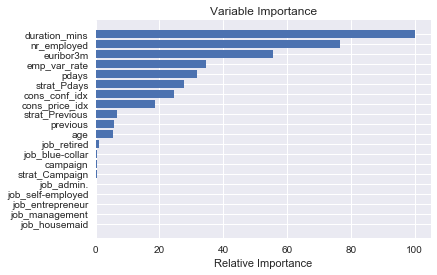

In [33]:
feature_importance = rf_maxd.feature_importances_

#make importances relative to max importance
feature_importance = 100.0*(feature_importance / feature_importance.max())
show_features = feature_importance[:20] #top twenty
sorted_idx =np.argsort(show_features)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.barh(pos, show_features[sorted_idx], align='center')
plt.yticks(pos,X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Rerun model with only features of relative importance:

In [ ]:
feature_selection = X['duration_mins', 'nr_employed', 'euribor3m', 'emp_var_rate', 'pdays', 'strat']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)